In [1]:
# Importing Libraries
import os
import numpy as np
import cv2
import random
from tqdm.notebook import tqdm_notebook as bar
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
# Importing Images
CATEGORIES = ['cat', 'dog']
data = []
for category in CATEGORIES:
    folder = os.path.join(r'./train', category)
    label = CATEGORIES.index(category)
    print(f'Reading {category} images')
    for img in bar(os.listdir(folder)):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (128, 128))                # Image Reshaping
        data.append([img_arr, label])

Reading cat images


  0%|          | 0/12500 [00:00<?, ?it/s]

Reading dog images


  0%|          | 0/12500 [00:00<?, ?it/s]

In [3]:
# Data Shuffling
random.shuffle(data)

In [4]:
# Features and Label Separation
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

In [5]:
# Numpy Conversion
X = np.array(X)
y = np.array(y)

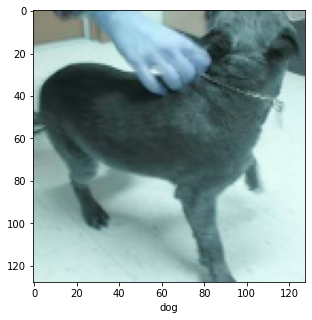

In [6]:
# Displaying Image
plt.figure(figsize=(5, 5))
plt.imshow(X[0])
plt.xlabel(CATEGORIES[y[0]])
plt.xticks()
plt.yticks()
plt.show()

In [7]:
# Data Reshaping
X_train = X[: 5000] / 255
y_train = y[: 5000]
X_test = X[5000: 6000] / 255
y_test = y[5000: 6000]

In [8]:
# Data Shape
X_train.shape, y_train.shape

((5000, 128, 128, 3), (5000,))

In [9]:
# Reshaped Data
print('Training Features')
print(f'{X_train[0][0][0: 8, 0:]}\n')
print(f'Training Labels: {y_train[0]}')

Training Features
[[0.5254902  0.52156863 0.44313725]
 [0.5254902  0.52156863 0.44313725]
 [0.52941176 0.5254902  0.44705882]
 [0.53333333 0.52941176 0.45098039]
 [0.52941176 0.5254902  0.44705882]
 [0.53333333 0.52941176 0.45098039]
 [0.5372549  0.53333333 0.45490196]
 [0.5372549  0.53333333 0.45490196]]

Training Labels: 1


In [10]:
# Saving Arrays
try:
    os.mkdir('./bin')
except FileExistsError:
    pass
finally:
    pkl.dump(X_train, open(r'./bin/feature_train.pkl', 'wb'))
    pkl.dump(y_train, open(r'./bin/class_train.pkl', 'wb'))
    pkl.dump(X_test, open(r'./bin/feature_test.pkl', 'wb'))
    pkl.dump(y_test, open(r'./bin/class_test.pkl', 'wb'))